In [12]:
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from keras.preprocessing import image
import numpy as np
from keras.utils import np_utils
from skimage.transform import resize
from PIL import Image
import re
import os
import random
import shutil
import keras
from keras.models import load_model
import tensorflow

In [13]:
from google.colab import drive

In [14]:
drive.mount("/content/drive") # Don't change this.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os
os.chdir("/content/drive/My Drive/Clash_Prediction/")

In [16]:
path1 = "/content/drive/My Drive/mediumTry/Combined_V_NV"
listingVid = os.listdir(path1)
print(len(listingVid))
listingVid.sort()
print(listingVid)

FileNotFoundError: ignored

In [ ]:
!dir

cnn_lstm_model_new3.h5	   DSCombined	   rename.py
cnn_lstm_model_new4.h5	   fight	   RTPF
cnn_lstm_model_new5adv.h5  Fight_No_Fight  stretch_model_conv_3d_new4adv.h5
Combined_V_NV		   fnfFinal	   stretch_model_conv_3d_new4.h5
DepricatedModels	   jk.py	   TrainTest
DS2000			   noFight	   updated.ipynb


In [17]:
os.getcwd()
path='/content/drive/My Drive/Clash_Prediction'
video_directory=os.path.join(path,"Combined_V_NV")
videos=os.listdir(video_directory)

label=[]
for i in videos:
    if "NV_" in i:
        label.append(0)
    elif "V_" in i:
        label.append(1)
    else:
        label.append("file_name_incorrect")
        
videos=pd.DataFrame(videos,label).reset_index()
videos.columns=["labels","video_name"]

videos.groupby('labels').count()

,video_name
labels,
0,1000
1,1000


In [18]:
# Splitting the videos into Train and Test Videos:
No_Fight=videos.loc[videos["labels"]==0,]
fight=videos.loc[videos["labels"]==1,]

fight_range=np.arange(len(fight))
No_Fight_range=np.arange(len(No_Fight))
np.random.seed(14)
np.random.shuffle(fight_range)
np.random.shuffle(No_Fight_range)

fight=fight.iloc[fight_range,]
No_Fight=No_Fight.iloc[No_Fight_range,]

train_fight=fight.iloc[:800,]
train_No_Fight=No_Fight.iloc[:800,]
test_fight=fight.iloc[800:,]
test_No_Fight=No_Fight.iloc[800:,]

train_set=train_No_Fight.append(train_fight)
test_set=test_No_Fight.append(test_fight)

train_set=train_set.reset_index().drop("index",axis=1)
test_set=test_set.reset_index().drop("index",axis=1)

In [19]:
print(train_set.groupby('labels').count())
print(test_set.groupby('labels').count())

        video_name
labels            
0              800
1              800
        video_name
labels            
0              200
1              200


In [20]:
fnf_dir_path=os.path.join(path,'DS2000')
train_videos_dir=os.path.join(fnf_dir_path,"Train_Videos")
test_videos_dir=os.path.join(fnf_dir_path,"Test_Videos")

In [21]:
fnf_dir_path=os.path.join(path,'DS2000')
train_videos_dir=os.path.join(fnf_dir_path,"Train_Videos")
test_videos_dir=os.path.join(fnf_dir_path,"Test_Videos")
try:
    os.mkdir(fnf_dir_path)
except FileExistsError as ae:
    print("Folder Already Created")

try:
    os.mkdir(train_videos_dir)
except FileExistsError as ae:
    print("Folder Already Created")
    
try:
    os.mkdir(test_videos_dir)
except FileExistsError as ae:
    print("Folder Already Created")

Folder Already Created
Folder Already Created
Folder Already Created


In [22]:
fnf_path = os.path.join(path, "DS2000")

In [11]:
fnf_path = os.path.join(path, "DS2000")


def video_capturing_function(dataset, folder_name):
    for i in np.arange(len(dataset)):
        video_name = dataset.video_name[i]
        video_read_path = os.path.join(video_directory, video_name)
        cap = cv2.VideoCapture(video_read_path)
        try:
            os.mkdir(os.path.join(os.path.join(fnf_path, folder_name),
                                video_name.split(".")[0]))
        except:
            print("File Already Created")

        train_write_file = os.path.join(os.path.join(fnf_path, folder_name),
                                        video_name.split(".")[0])
        cap.set(cv2.CAP_PROP_FPS, 20)
        frameRate = cap.get(5)
        x = 1
        count = 0
        while(cap.isOpened()):
            frameId = cap.get(1)  # current frame number
            ret, frame = cap.read()
            if (ret != True):
                break
            if (frameId % math.floor(frameRate) == 0):
                filename = "frame%d.jpg" % count
                count += 1
                frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                cv2.imwrite(os.path.join(
                    train_write_file, filename), frame_grey)
        cap.release()
    return print("All frames written in the: "+folder_name+" Folder")


video_capturing_function(train_set, "Train_Videos")
video_capturing_function(test_set, "Test_Videos")


File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created
File Already Created


KeyboardInterrupt: ignored

In [23]:
train_dir_path='/content/drive/My Drive/Clash_Prediction/DS2000/Train_Videos'
test_dir_path='/content/drive/My Drive/Clash_Prediction/DS2000/Test_Videos'


In [24]:
# Code to see how many frames are captured for each video:
train_dir_path='/content/drive/My Drive/Clash_Prediction/DS2000/Train_Videos'
test_dir_path='/content/drive/My Drive/Clash_Prediction/DS2000/Test_Videos'

vid_file_name=train_set.video_name[0].split('.')[0]

train_frames=[]
for i in np.arange(len(train_set.video_name)):
    vid_file_name=train_set.video_name[i].split('.')[0]
    train_frames.append(len(os.listdir(os.path.join(train_dir_path,vid_file_name))))

test_frames=[]
for i in np.arange(len(test_set.video_name)):
    vid_file_name=test_set.video_name[i].split('.')[0]
    test_frames.append(len(os.listdir(os.path.join(test_dir_path,vid_file_name))))

In [25]:
def frame_generating_function(dataset,dir_path):
    for i in np.arange(len(dataset.video_name)):
        vid_namu=dataset.video_name[i]
        vid_path=os.path.join(dir_path,vid_namu.split(".")[0])
        len_frame=len(os.listdir(vid_path))
        j=5-len(os.listdir(vid_path))
        if j>0:
            list_frames=os.listdir(vid_path)
            c=0
            for k in np.arange(j):
                list_frames=os.listdir(vid_path)
                frame=os.path.join(vid_path,list_frames[c])
                countu=k+len_frame
                new_frame="frame%d.jpg" % countu
                shutil.copy2(frame,os.path.join(vid_path,new_frame))
                c+=1
        else:
            pass
    return print("Frame Generation Done!")
    
frame_generating_function(train_set,train_dir_path)
frame_generating_function(test_set,test_dir_path)

Frame Generation Done!
Frame Generation Done!


In [26]:
# Train and Validation Splitting:
label_1_dat=train_set.loc[train_set["labels"]==1,]
label_0_dat=train_set.loc[train_set["labels"]==0,]

train_len_label1=math.floor(len(label_1_dat)*0.80)
train_len_label0=math.floor(len(label_0_dat)*0.80)

train_dat_label1=label_1_dat.iloc[:train_len_label1,]
train_dat_label0=label_0_dat.iloc[:train_len_label0,]

validation_dat_label1=label_1_dat.iloc[train_len_label1:,]
validation_dat_label0=label_0_dat.iloc[train_len_label0:,]

train_vid_dat=train_dat_label1.append(train_dat_label0,ignore_index=True)
validation_vid_dat=validation_dat_label1.append(validation_dat_label0,ignore_index=True)

In [27]:
# Data load function for 10 frames:

def data_load_function_10frames(dataset,directory):
    frames=[]
    for i in np.arange(len(dataset)):
        vid_name=dataset.video_name[i].split(".")[0]
        vid_dir_path=os.path.join(directory,vid_name)
        #print(vid_dir_path)  
        frames_to_select=[]
        for l in np.arange(0,5):
            frames_to_select.append('frame%d.jpg' % l)
        vid_data=[]
        for frame in frames_to_select:
            #pa = os.path.join(vid_dir_path, frame)
            #print(pa)
            image=Image.open(os.path.join(vid_dir_path,frame))
            image=image.resize((250, 250), Image.ANTIALIAS) 
            #print(image.mode)
            #print(image.size)
            datu=np.asarray(image)
            normu_dat=datu/255
            vid_data.append(normu_dat)
        vid_data=np.array(vid_data)
        #print(vid_data)
        frames.append(vid_data)
    return np.array(frames)

In [28]:
# 10 frames train,validation and test data:

test_dataset_new=data_load_function_10frames(test_set,test_dir_path)
train_dataset_new=data_load_function_10frames(train_vid_dat,train_dir_path)
validation_dataset_new=data_load_function_10frames(validation_vid_dat,train_dir_path)

test_labels=np.array(test_set.labels)
train_labels=np.array(train_vid_dat.labels)
validation_labels=np.array(validation_vid_dat.labels)

In [29]:
# Reshaping tensors to confirm with the model we are going to train:
test_dataset_new=test_dataset_new.reshape((400,5,250,250,1))
train_dataset_new=train_dataset_new.reshape((1280,5,250,250,1))
validation_dataset_new=validation_dataset_new.reshape((320,5,250,250,1))

In [ ]:
baseline_predictions=np.ones(len(test_labels))
test_accuracy_naive=np.where(baseline_predictions==test_labels)[0].shape[0]/len(test_labels)
test_accuracy_naive

0.5

In [ ]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
model_cnlst = models.Sequential()
model_cnlst.add(TimeDistributed(Conv2D(128, (3, 3), strides=(1,1),activation='relu'),input_shape=(5, 250, 250, 1)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(Conv2D(32, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(BatchNormalization()))


model_cnlst.add(TimeDistributed(Flatten()))
model_cnlst.add(Dropout(0.2))

model_cnlst.add(LSTM(32,return_sequences=False,dropout=0.2)) # used 32 units

model_cnlst.add(Dense(64,activation='relu'))
model_cnlst.add(Dense(32,activation='relu'))
model_cnlst.add(Dropout(0.2))
model_cnlst.add(Dense(1, activation='sigmoid'))
model_cnlst.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 5, 248, 248, 128)  1280      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 246, 246, 64)   73792     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 123, 123, 64)   0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 5, 121, 121, 64)   36928     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 5, 119, 119, 32)   18464     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 5, 59, 59, 32)     0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 5, 59, 59, 32)     1

In [ ]:

# 'cnn_lstm_model_new5.h5'
import tensorflow
from tensorflow.keras.optimizers import SGD
callbacks_list_cnlst=[tensorflow.keras.callbacks.EarlyStopping(
monitor='acc',patience=3),
               tensorflow.keras.callbacks.ModelCheckpoint(
               filepath='model2.h5',
               monitor='val_loss',
               save_best_only=True),
                tensorflow.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 3)
               ]

from tensorflow.keras import optimizers
optimizer_new=optimizers.RMSprop(lr=0.01)
model_cnlst.compile(optimizer=optimizer_new,loss= 'binary_crossentropy',metrics=['acc'])

In [ ]:
history_new_cnlst=model_cnlst.fit(train_dataset_new,train_labels,epochs=50,batch_size=5,
               validation_data=(validation_dataset_new,validation_labels),
               callbacks=callbacks_list_cnlst)

Epoch 1/50
256/256 [==============================] - 65s 246ms/step - loss: 0.6987 - acc: 0.4962 - val_loss: 0.6922 - val_acc: 0.4906
Epoch 2/50
256/256 [==============================] - 64s 249ms/step - loss: 0.6905 - acc: 0.5164 - val_loss: 0.6915 - val_acc: 0.5156
Epoch 3/50
256/256 [==============================] - 65s 252ms/step - loss: 0.6942 - acc: 0.5166 - val_loss: 0.6987 - val_acc: 0.4406
Epoch 4/50
256/256 [==============================] - 64s 250ms/step - loss: 0.6966 - acc: 0.5179 - val_loss: 0.6926 - val_acc: 0.5188
Epoch 5/50
256/256 [==============================] - 64s 251ms/step - loss: 0.6953 - acc: 0.5037 - val_loss: 0.6922 - val_acc: 0.5250
Epoch 6/50
256/256 [==============================] - 64s 250ms/step - loss: 0.6949 - acc: 0.4859 - val_loss: 0.6911 - val_acc: 0.5219


In [ ]:
#modelu_5=load_model('cnn_lstm_model_new3.h5')
#print(modelu_5.epochs)
ep = len(history_new_cnlst.history['loss'])
print(ep)

6


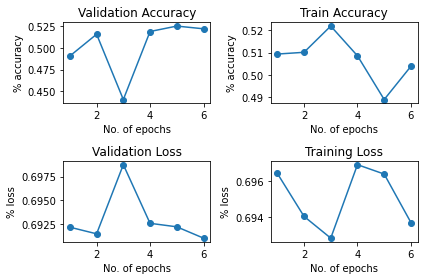

In [ ]:
acc=history_new_cnlst.history["acc"]
val_acc=history_new_cnlst.history["val_acc"]
loss=history_new_cnlst.history["loss"]
val_loss=history_new_cnlst.history["val_loss"]
epochs=np.arange(1,7)

plt.figure()
plt.subplot(2,2,1)
plt.xlabel("No. of epochs")
plt.ylabel("% accuracy")
plt.plot(epochs,val_acc,'-o')
plt.title('Validation Accuracy')

plt.subplot(2,2,2)
plt.xlabel("No. of epochs")
plt.ylabel("% accuracy")
plt.plot(epochs,acc,'-o')
plt.title('Train Accuracy')

plt.subplot(2,2,3)
plt.xlabel("No. of epochs")
plt.ylabel("% loss")
plt.plot(epochs,val_loss,'-o')
plt.title('Validation Loss')

plt.subplot(2,2,4)
plt.xlabel("No. of epochs")
plt.ylabel("% loss")
plt.plot(epochs,loss,'-o')
plt.title('Training Loss')


plt.tight_layout()

In [ ]:
modelu_5=load_model('cnn_lstm_model_new3.h5')
modelu_5.evaluate(test_dataset_new,test_labels)

13/13 [==============================] - 7s 422ms/step - loss: 0.6843 - acc: 0.5650


[0.6843424439430237, 0.5649999976158142]

In [ ]:
model_cnlst = models.Sequential()
model_cnlst.add(TimeDistributed(Conv2D(128, (3, 3), strides=(1,1),activation='relu'),input_shape=(5, 250, 250, 1)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(Conv2D(32, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(BatchNormalization()))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))

model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(Conv2D(32, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(Conv2D(32, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(BatchNormalization()))
model_cnlst.add(TimeDistributed(Flatten()))
model_cnlst.add(Dropout(0.2))

model_cnlst.add(LSTM(64,return_sequences=False,dropout=0.2)) # used 32 units
model_cnlst.add(Dense(128,activation='relu'))
model_cnlst.add(BatchNormalization())
model_cnlst.add(Dense(64,activation='relu'))
model_cnlst.add(Dense(32,activation='relu'))
model_cnlst.add(Dropout(0.2))
model_cnlst.add(Dense(1, activation='sigmoid'))
model_cnlst.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_23 (TimeDis (None, 5, 248, 248, 128)  1280      
_________________________________________________________________
time_distributed_24 (TimeDis (None, 5, 246, 246, 64)   73792     
_________________________________________________________________
time_distributed_25 (TimeDis (None, 5, 123, 123, 64)   0         
_________________________________________________________________
time_distributed_26 (TimeDis (None, 5, 121, 121, 64)   36928     
_________________________________________________________________
time_distributed_27 (TimeDis (None, 5, 119, 119, 32)   18464     
_________________________________________________________________
time_distributed_28 (TimeDis (None, 5, 119, 119, 32)   128       
_________________________________________________________________
time_distributed_29 (TimeDis (None, 5, 59, 59, 32)    

In [ ]:
callbacks_list_cnlst=[keras.callbacks.EarlyStopping(
monitor='acc',patience=3),
               keras.callbacks.ModelCheckpoint(
               filepath='model3p1.h5',
               monitor='val_loss',
               save_best_only=True),
                keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 3)
               ]

from keras import optimizers
optimizer_new=optimizers.RMSprop(lr=0.01)
model_cnlst.compile(optimizer=optimizer_new,loss='binary_crossentropy',metrics=['acc'])




In [ ]:

history=model_cnlst.fit(train_dataset_new,train_labels,batch_size=5,epochs=25,
                        validation_data=(validation_dataset_new,validation_labels),
                       callbacks=callbacks_list_cnlst) 

Epoch 1/25
256/256 [==============================] - 69s 261ms/step - loss: 0.8764 - acc: 0.5575 - val_loss: 0.7086 - val_acc: 0.5281
Epoch 2/25
256/256 [==============================] - 65s 253ms/step - loss: 0.7061 - acc: 0.4839 - val_loss: 0.6925 - val_acc: 0.5125
Epoch 3/25
256/256 [==============================] - 64s 249ms/step - loss: 0.7049 - acc: 0.5362 - val_loss: 0.6970 - val_acc: 0.4969
Epoch 4/25
256/256 [==============================] - 64s 250ms/step - loss: 0.6999 - acc: 0.5692 - val_loss: 0.7196 - val_acc: 0.5000
Epoch 5/25
256/256 [==============================] - 64s 250ms/step - loss: 0.6991 - acc: 0.5248 - val_loss: 0.7344 - val_acc: 0.5031
Epoch 6/25
256/256 [==============================] - 64s 250ms/step - loss: 0.6933 - acc: 0.5298 - val_loss: 0.7627 - val_acc: 0.4906
Epoch 7/25
256/256 [==============================] - 64s 250ms/step - loss: 0.6850 - acc: 0.5613 - val_loss: 0.6890 - val_acc: 0.5469


In [ ]:

acc=history.history["acc"]
val_acc=history.history["val_acc"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=np.arange(1,8)

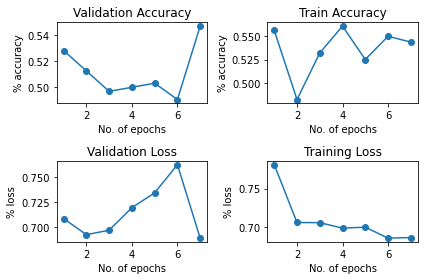

In [ ]:

plt.figure()
plt.subplot(2,2,1)
plt.xlabel("No. of epochs")
plt.ylabel("% accuracy")
plt.plot(epochs,val_acc,'-o')
plt.title('Validation Accuracy')

plt.subplot(2,2,2)
plt.xlabel("No. of epochs")
plt.ylabel("% accuracy")
plt.plot(epochs,acc,'-o')
plt.title('Train Accuracy')

plt.subplot(2,2,3)
plt.xlabel("No. of epochs")
plt.ylabel("% loss")
plt.plot(epochs,val_loss,'-o')
plt.title('Validation Loss')

plt.subplot(2,2,4)
plt.xlabel("No. of epochs")
plt.ylabel("% loss")
plt.plot(epochs,loss,'-o')
plt.title('Training Loss')


plt.tight_layout()

In [ ]:
from keras.models import load_model
#modelu_5=load_model('cnn_lstm_model_new4.h5')
modelu_5=load_model('model3p1.h5')
 
modelu_5.evaluate(test_dataset_new,test_labels)

13/13 [==============================] - 6s 447ms/step - loss: 0.6764 - acc: 0.5775


[0.6764441728591919, 0.5774999856948853]

In [ ]:
import tensorflow 

In [ ]:

from tensorflow.keras.layers import Conv3D, MaxPooling3D, BatchNormalization, Dropout, Dense, Flatten, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import Input
# 3D Convolutional Model:
input_model=Input(shape=(5,250,250,1))
layer=Conv3D(32,(3,3,3),strides=(1,1,1),activation='relu')(input_model)
layer=MaxPooling3D((2,2,2), padding='same')(layer)
layer=Conv3D(64,(3,3,3),strides=(1,1,1), padding='same', activation='relu')(layer)
layer=MaxPooling3D((2,2,2), padding='same')(layer)
layer=BatchNormalization()(layer)
layer=Flatten()(layer)
layer=Dense(128,activation='relu')(layer)
layer=Dropout(0.1)(layer)
layer=Dense(64,activation='relu')(layer)
layer=Dense(32,activation='relu')(layer)
layer_output=Dense(1,activation='sigmoid')(layer)

model_3dConv=Model(input_model,layer_output)

model_3dConv.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 250, 250, 1)]  0         
_________________________________________________________________
conv3d (Conv3D)              (None, 3, 248, 248, 32)   896       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 2, 124, 124, 32)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 2, 124, 124, 64)   55360     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 1, 62, 62, 64)     0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 62, 62, 64)     256       
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0     

In [ ]:
# Conv3d model training:
from keras import optimizers
optimizer_new=optimizers.RMSprop(lr=0.1)
optimizer_adagrad=keras.optimizers.Adagrad(lr=0.01)
callbacks_list_conv_3d=[keras.callbacks.EarlyStopping(
monitor='acc',patience=6),
               keras.callbacks.ModelCheckpoint(
               filepath='stretch_model_conv_3d_new4.h5',
               monitor='val_loss',
               save_best_only=True),
                        keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 2)
               ]
model_3dConv.compile(optimizer=optimizer_adagrad,loss='binary_crossentropy',metrics=['acc'])
conv_3d_model_history=model_3dConv.fit(train_dataset_new,train_labels,batch_size=3,epochs=50,
               validation_data=(validation_dataset_new,validation_labels),
               callbacks=callbacks_list_conv_3d)

Epoch 1/50
427/427 [==============================] - 18s 41ms/step - loss: 1.3580 - acc: 0.5808 - val_loss: 0.6889 - val_acc: 0.5562
Epoch 2/50
427/427 [==============================] - 17s 40ms/step - loss: 0.5173 - acc: 0.7556 - val_loss: 0.4794 - val_acc: 0.7875
Epoch 3/50
427/427 [==============================] - 17s 41ms/step - loss: 0.2318 - acc: 0.9089 - val_loss: 0.5130 - val_acc: 0.8344
Epoch 4/50
427/427 [==============================] - 17s 40ms/step - loss: 0.1207 - acc: 0.9604 - val_loss: 0.4308 - val_acc: 0.8500
Epoch 5/50
427/427 [==============================] - 17s 41ms/step - loss: 0.0648 - acc: 0.9792 - val_loss: 0.5454 - val_acc: 0.8375
Epoch 6/50
427/427 [==============================] - 17s 41ms/step - loss: 0.0361 - acc: 0.9917 - val_loss: 0.5768 - val_acc: 0.8781
Epoch 7/50
427/427 [==============================] - 18s 41ms/step - loss: 0.0141 - acc: 0.9928 - val_loss: 0.5315 - val_acc: 0.8656
Epoch 8/50
427/427 [==============================] - 18s 41ms

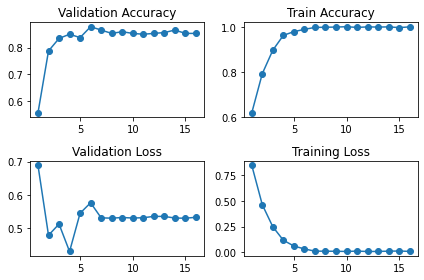

In [ ]:
acc=conv_3d_model_history.history["acc"]
val_acc=conv_3d_model_history.history["val_acc"]
loss=conv_3d_model_history.history["loss"]
val_loss=conv_3d_model_history.history["val_loss"]


epochs=np.arange(1,17)

plt.figure()
plt.subplot(2,2,1)
plt.plot(epochs,val_acc,'-o')
plt.title('Validation Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs,acc,'-o')
plt.title('Train Accuracy')

plt.subplot(2,2,3)
plt.plot(epochs,val_loss,'-o')
plt.title('Validation Loss')

plt.subplot(2,2,4)
plt.plot(epochs,loss,'-o')
plt.title('Training Loss')


plt.tight_layout()

In [ ]:
import os
os.chdir("/content/drive/My Drive/mediumTry/")

In [ ]:
!dir

cnn_lstm_model_new3.h5	fight		RTPF
cnn_lstm_model_new4.h5	Fight_No_Fight	stretch_model_conv_3d_new4.h5
Combined_V_NV		fnfFinal	TrainTest
DepricatedModels	jk.py		updated.ipynb
DS2000			noFight
DSCombined		rename.py


In [ ]:
modelu_6=load_model('stretch_model_conv_3d_new4.h5')

In [ ]:

modelu_6=load_model('stretch_model_conv_3d_new4.h5')

modelu_6.evaluate(test_dataset_new,test_labels)

13/13 [==============================] - 9s 108ms/step - loss: 0.4443 - acc: 0.8250


[0.4442555904388428, 0.824999988079071]

In [ ]:

test_preds=modelu_6.predict(test_dataset_new)

In [ ]:
modelu_cnlst_1=load_model('cnn_lstm_model_new3.h5')
modelu_cnlst_2=load_model('cnn_lstm_model_new4.h5')

model_1_in=modelu_cnlst_1.predict(train_dataset_new)
model_2_in=modelu_cnlst_2.predict(train_dataset_new)
model_3_in=modelu_6.predict(train_dataset_new)

In [ ]:
input_dat_in=np.hstack([model_1_in,model_2_in,model_3_in])

In [ ]:
from keras import layers, models
model_ens=models.Sequential()
model_ens.add(layers.Dense(1,activation='linear',input_shape=(3,)))
model_ens.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_ens.compile(loss='mse',metrics=['acc'],optimizer='rmsprop')

In [ ]:

model_ens.fit(input_dat_in,train_labels,batch_size=5,epochs=25,validation_split=0.2)

Epoch 1/25
205/205 [==============================] - 1s 3ms/step - loss: 0.3373 - acc: 0.7482 - val_loss: 0.0844 - val_acc: 0.9727
Epoch 2/25
205/205 [==============================] - 1s 3ms/step - loss: 0.0346 - acc: 0.9766 - val_loss: 0.0194 - val_acc: 0.9844
Epoch 3/25
205/205 [==============================] - 0s 2ms/step - loss: 0.0187 - acc: 0.9840 - val_loss: 0.0155 - val_acc: 0.9844
Epoch 4/25
205/205 [==============================] - 0s 2ms/step - loss: 0.0186 - acc: 0.9841 - val_loss: 0.0142 - val_acc: 0.9844
Epoch 5/25
205/205 [==============================] - 0s 2ms/step - loss: 0.0217 - acc: 0.9766 - val_loss: 0.0136 - val_acc: 0.9844
Epoch 6/25
205/205 [==============================] - 1s 3ms/step - loss: 0.0233 - acc: 0.9776 - val_loss: 0.0133 - val_acc: 0.9844
Epoch 7/25
205/205 [==============================] - 0s 2ms/step - loss: 0.0232 - acc: 0.9758 - val_loss: 0.0122 - val_acc: 0.9883
Epoch 8/25
205/205 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
model_1_out=modelu_cnlst_1.predict(test_dataset_new)
model_2_out=modelu_cnlst_2.predict(test_dataset_new)
model_3_out=modelu_6.predict(test_dataset_new)

In [ ]:
model_out_final=np.hstack([model_1_out,model_2_out,model_3_out])

In [ ]:
ensemble_loss,ensemble_accuracy=model_ens.evaluate(model_out_final,test_labels)
ensemble_accuracy

13/13 [==============================] - 0s 2ms/step - loss: 0.1302 - acc: 0.8250


0.824999988079071

In [ ]:
modelu_cnlst_1=load_model('cnn_lstm_model_new3.h5')
modelu_cnlst_2=load_model('cnn_lstm_model_new4.h5')

**Test With real time video**

In [ ]:
#modelu_cnlst_1=load_model('cnn_lstm_model_new4.h5')
#modelu_cnlst_2=load_model('stretch_model_conv_3d_new4.h5') v4, v7, v9

In [ ]:
path='/content/drive/My Drive/mediumTry/RTPF'

In [ ]:
from moviepy.video.io.VideoFileClip import VideoFileClip
def video_folder_create(path,video_folder_name,video_name):
    video_folder_path=os.path.join(path,video_folder_name)
    try:
        os.mkdir(os.path.join(path,video_folder_name))
    except:
        print("Folder already created")
    input_video_path=os.path.join(path,video_name)
    times=[[0,5],[6,10],[11,15],[16,20],[21,25],[26,30],[31,35],[36,40],[41,45],[46,50],[51,55],[56,59]]
    for i in np.arange(len(times)):
        vid_name="vid_%d.mp4" % i
        output_video_path=os.path.join(video_folder_path,vid_name)
        with VideoFileClip(input_video_path) as video:
            new = video.subclip(times[i][0], times[i][1])
            new.write_videofile(output_video_path,audio_codec='aac')
    return True

# Creating 5 folders for 5 test videos:
video_folder_create(path,'test_rl_1','vid_1.mp4')
video_folder_create(path,'test_rl_2','vid_2.mp4')
video_folder_create(path,'test_rl_3','vid_3.mp4')
video_folder_create(path,'test_rl_4','vid_5.mp4')
video_folder_create(path,'test_rl_5','vid_6.mp4')
video_folder_create(path,'test_rl_6','vid_8.mp4')
video_folder_create(path,'test_rl_7','vid_10.mp4')


#video_folder_create(path,'test_rl_4','test_rl_4.mp4')

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_0.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_0.mp4


 99%|█████████▉| 185/186 [00:00<00:00, 305.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_0.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_1.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_1.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 297.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_1.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_2.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_2.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 291.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_2.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_3.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_3.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 243.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_3.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_4.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_4.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 314.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_4.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_5.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_5.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 310.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_5.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_6.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_6.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 324.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_6.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_7.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_7.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 289.35it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_7.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_8.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_8.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 313.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_8.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_9.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_9.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 345.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_9.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_10.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_10.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 317.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_10.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_11.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_11.mp4


 99%|█████████▉| 111/112 [00:00<00:00, 314.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_1/vid_11.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_0.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_0.mp4


 99%|█████████▉| 185/186 [00:00<00:00, 300.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_0.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_1.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_1.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 368.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_1.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_2.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_2.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 271.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_2.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_3.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_3.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 260.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_3.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_4.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_4.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 391.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_4.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_5.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_5.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 534.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_5.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_6.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_6.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 246.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_6.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_7.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_7.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 327.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_7.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_8.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_8.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 397.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_8.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_9.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_9.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 479.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_9.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_10.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_10.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 239.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_10.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_11.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_11.mp4


 99%|█████████▉| 111/112 [00:00<00:00, 390.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_2/vid_11.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_0.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_0.mp4


 99%|█████████▉| 185/186 [00:00<00:00, 373.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_0.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_1.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_1.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 453.71it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_1.mp4 



[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_2.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_2.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 244.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_2.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_3.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_3.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 242.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_3.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_4.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_4.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 326.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_4.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_5.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_5.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 373.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_5.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_6.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_6.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 292.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_6.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_7.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_7.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 226.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_7.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_8.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_8.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 465.90it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_8.mp4 



[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_9.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_9.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 357.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_9.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_10.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_10.mp4


 99%|█████████▉| 148/149 [00:00<00:00, 237.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_10.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_11.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_11.mp4


 99%|█████████▉| 111/112 [00:00<00:00, 300.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_3/vid_11.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_0.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_0.mp4


 99%|█████████▉| 150/151 [00:01<00:00, 94.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_0.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_1.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_1.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 93.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_1.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_2.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_2.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 84.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_2.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_3.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_3.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 92.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_3.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_4.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_4.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 116.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_4.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_5.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_5.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 101.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_5.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_6.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_6.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 90.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_6.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_7.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_7.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 78.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_7.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_8.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_8.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 98.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_8.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_9.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_9.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 80.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_9.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_10.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_10.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 96.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_10.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_11.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_11.mp4


 99%|█████████▉| 90/91 [00:00<00:00, 127.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_4/vid_11.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_0.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_0.mp4


 99%|█████████▉| 150/151 [00:01<00:00, 97.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_0.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_1.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_1.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 100.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_1.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_2.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_2.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 93.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_2.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_3.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_3.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 97.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_3.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_4.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_4.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 118.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_4.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_5.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_5.mp4


 99%|█████████▉| 120/121 [00:00<00:00, 171.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_5.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_6.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_6.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 95.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_6.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_7.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_7.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 96.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_7.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_8.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_8.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 87.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_8.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_9.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_9.mp4


 99%|█████████▉| 120/121 [00:00<00:00, 124.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_9.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_10.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_10.mp4


 99%|█████████▉| 120/121 [00:01<00:00, 92.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_10.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_11.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_11.mp4


 99%|█████████▉| 90/91 [00:00<00:00, 104.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_5/vid_11.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_0.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_0.mp4


 99%|█████████▉| 150/151 [00:03<00:00, 37.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_0.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_1.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_1.mp4


 99%|█████████▉| 120/121 [00:03<00:00, 37.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_1.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_2.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_2.mp4


 99%|█████████▉| 120/121 [00:04<00:00, 24.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_2.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_3.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_3.mp4


 99%|█████████▉| 120/121 [00:05<00:00, 22.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_3.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_4.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_4.mp4


 99%|█████████▉| 120/121 [00:03<00:00, 37.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_4.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_5.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_5.mp4


 99%|█████████▉| 120/121 [00:04<00:00, 28.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_5.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_6.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_6.mp4


 99%|█████████▉| 120/121 [00:04<00:00, 28.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_6.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_7.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_7.mp4


 99%|█████████▉| 120/121 [00:04<00:00, 24.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_7.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_8.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_8.mp4


 99%|█████████▉| 120/121 [00:03<00:00, 38.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_8.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_9.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_9.mp4


 99%|█████████▉| 120/121 [00:02<00:00, 41.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_9.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_10.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_10.mp4


 99%|█████████▉| 120/121 [00:05<00:00, 22.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_10.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_11.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_11.mp4


 99%|█████████▉| 90/91 [00:03<00:00, 27.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_6/vid_11.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_0.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_0.mp4


 99%|█████████▉| 150/151 [00:06<00:00, 22.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_0.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_1.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_1.mp4


 99%|█████████▉| 120/121 [00:03<00:00, 30.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_1.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_2.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_2.mp4


 99%|█████████▉| 120/121 [00:04<00:00, 24.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_2.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_3.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_3.mp4


 99%|█████████▉| 120/121 [00:05<00:00, 22.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_3.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_4.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_4.mp4


 99%|█████████▉| 120/121 [00:03<00:00, 31.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_4.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_5.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_5.mp4


 99%|█████████▉| 120/121 [00:04<00:00, 28.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_5.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_6.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_6.mp4


 99%|█████████▉| 120/121 [00:05<00:00, 22.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_6.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_7.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_7.mp4


 99%|█████████▉| 120/121 [00:04<00:00, 24.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_7.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_8.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_8.mp4


 99%|█████████▉| 120/121 [00:04<00:00, 25.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_8.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_9.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_9.mp4


 99%|█████████▉| 120/121 [00:04<00:00, 28.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_9.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_10.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_10.mp4


 99%|█████████▉| 120/121 [00:05<00:00, 22.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_10.mp4 

[MoviePy] >>>> Building video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_11.mp4
[MoviePy] Writing video /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_11.mp4


 99%|█████████▉| 90/91 [00:02<00:00, 30.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/My Drive/mediumTry/RTPF/test_rl_7/vid_11.mp4 



True

#Video-1

In [ ]:
def real_time_prediction(path,video_folder_name):
    folder_path=os.path.join(path,video_folder_name)
    video_list=os.listdir(folder_path)
    prediction_list_1=[]
    prediction_list_2=[]
    prediction_list_3=[]
    for i in np.arange(len(video_list)):
        video_path=os.path.join(folder_path,video_list[i])
        cap=cv2.VideoCapture(video_path)
        cap.set(cv2.CAP_PROP_FPS, 1)
        frameRate=cap.get(5)
        x=1
        count=0
        frame_saved=[]
        while(cap.isOpened()):
            frameId = cap.get(1) #current frame number
            ret, frame = cap.read()
            if (ret != True):
                break
            if (frameId % math.floor(frameRate) == 0):
                frame_grey=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                frame_grey=cv2.resize(frame_grey,(250,250))
                frame_grey=frame_grey/255
                frame_saved.append(frame_grey)
        cap.release()
        frame_diff=5-len(frame_saved)
        if frame_diff>0:
            for k in np.arange(frame_diff):
                frame_saved.append(frame_saved[k])
        else:
            pass
        frame_saved=frame_saved[:5]
        frame_saved=np.array(frame_saved)
        dats=frame_saved.reshape((1,5,250,250,1))
        prediction_list_1.append(modelu_cnlst_1.predict(dats))
        prediction_list_2.append(modelu_cnlst_2.predict(dats))
        prediction_list_3.append(modelu_6.predict(dats))
    return prediction_list_2,prediction_list_3

[0.5716109, 0.42854184, 0.45270094, 0.45270815, 0.58170104, 0.74259776, 0.5100859, 0.50858814, 0.4330636, 0.75855815, 0.45271823, 0.44272634]
[0.11893503, 0.18784052, 0.99982435, 0.99975556, 0.4153041, 0.15221226, 0.99972874, 0.34325877, 0.15427569, 0.67021257, 0.9692591, 0.9562652]


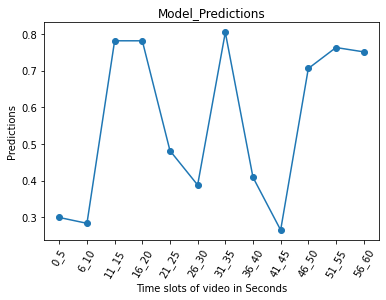

In [ ]:
# video_folder_create(path,'test_rl_1','test_rl_1.mp4')
prediction_model_2, prediction_model_3=real_time_prediction(path,"test_rl_1")
#predu_1=[]
#for i in prediction_model_1:
    #predu_1.append(list(i[0])[0])
predu_2=[]
for i in prediction_model_2:
    predu_2.append(list(i[0])[0])
predu_3=[]
for i in prediction_model_3:
    predu_3.append(list(i[0])[0])
times=[[0,5],[6,10],[11,15],[16,20],[21,25],[26,30],[31,35],[36,40],[41,45],[46,50],[51,55],[56,60]]
time_axis=[]
for i in times:
    time_axis.append(str(i[0])+"_"+str(i[1]))
#print(predu_1) 
print(predu_2) 
print(predu_3)
main_preds=0.4*(np.array(predu_2))+0.6*(np.array(predu_3))
plt.figure()
plt.plot(time_axis,main_preds,"-o")
plt.xlabel("Time slots of video in Seconds")
plt.xticks(rotation=60)
plt.ylabel("Predictions")
plt.title("Model_Predictions")
plt.show()

#Video-2

[0.7603128, 0.6160056, 0.5771028, 0.54403156, 0.4526399, 0.46226418, 0.53062713, 0.5146548, 0.45267642, 0.5069048, 0.517537, 0.52069366]
[0.34373334, 0.40536615, 0.9999963, 0.781633, 0.5727654, 0.03580495, 0.9999924, 0.9998441, 0.035585325, 0.010700095, 0.9999993, 0.99999976]


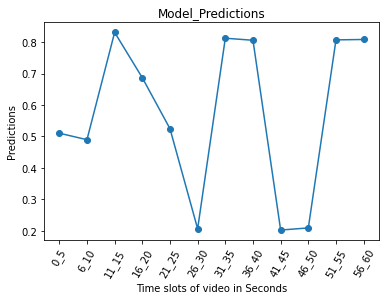

In [ ]:
# video_folder_create(path,'test_rl_1','test_rl_1.mp4')
prediction_model_2, prediction_model_3=real_time_prediction(path,"test_rl_2")
#predu_1=[]
#for i in prediction_model_1:
    #predu_1.append(list(i[0])[0])
predu_2=[]
for i in prediction_model_2:
    predu_2.append(list(i[0])[0])
predu_3=[]
for i in prediction_model_3:
    predu_3.append(list(i[0])[0])
times=[[0,5],[6,10],[11,15],[16,20],[21,25],[26,30],[31,35],[36,40],[41,45],[46,50],[51,55],[56,60]]
time_axis=[]
for i in times:
    time_axis.append(str(i[0])+"_"+str(i[1]))
#print(predu_1) 
print(predu_2) 
print(predu_3)
main_preds=0.4*(np.array(predu_2))+0.6*(np.array(predu_3))
plt.figure()
plt.plot(time_axis,main_preds,"-o")
plt.xlabel("Time slots of video in Seconds")
plt.xticks(rotation=60)
plt.ylabel("Predictions")
plt.title("Model_Predictions")
plt.show()

#Video-3

[0.5444085, 0.4285171, 0.5146379, 0.4517769, 0.49729872, 0.6581461, 0.5999742, 0.5146379, 0.4285171, 0.6581706, 0.4517767, 0.5968975]
[0.25741225, 0.002008899, 0.99996436, 0.998326, 0.01921837, 0.106981024, 0.9999839, 0.9999647, 0.0020011866, 0.10782133, 0.9982968, 0.99999225]


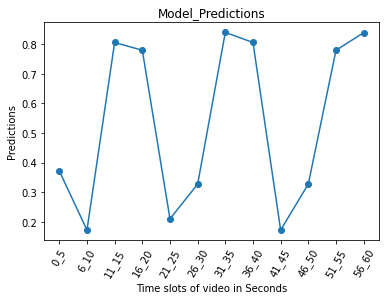

In [ ]:
# video_folder_create(path,'test_rl_1','test_rl_1.mp4')
prediction_model_2, prediction_model_3=real_time_prediction(path,"test_rl_3")
#predu_1=[]
#for i in prediction_model_1:
    #predu_1.append(list(i[0])[0])
predu_2=[]
for i in prediction_model_2:
    predu_2.append(list(i[0])[0])
predu_3=[]
for i in prediction_model_3:
    predu_3.append(list(i[0])[0])
times=[[0,5],[6,10],[11,15],[16,20],[21,25],[26,30],[31,35],[36,40],[41,45],[46,50],[51,55],[56,60]]
time_axis=[]
for i in times:
    time_axis.append(str(i[0])+"_"+str(i[1]))
#print(predu_1) 
print(predu_2) 
print(predu_3)
main_preds=0.4*(np.array(predu_2))+0.6*(np.array(predu_3))
plt.figure()
plt.plot(time_axis,main_preds,"-o")
plt.xlabel("Time slots of video in Seconds")
plt.xticks(rotation=60)
plt.ylabel("Predictions")
plt.title("Model_Predictions")
plt.show()

[array([0.4884314], dtype=float32), array([0.4828048], dtype=float32)]


ValueError: ignored

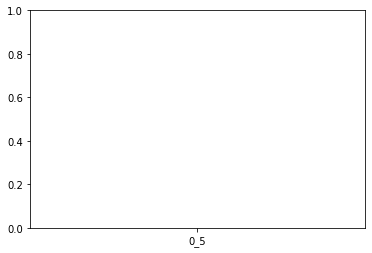

In [ ]:
# video_folder_create(path,'test_rl_1','test_rl_1.mp4')
prediction_model_3=real_time_prediction(path,"test_rl_3")
#predu_1=[]
#for i in prediction_model_1:
    #predu_1.append(list(i[0])[0])
#predu_2=[]
#for i in prediction_model_2:
    #predu_2.append(list(i[0])[0])
predu_3=[]
for i in prediction_model_3:
    predu_3.append(list(i[0])[0])
times=[[0,5],[6,10],[11,15],[16,20],[21,25],[26,30],[31,35],[36,40],[41,45],[46,50],[51,55],[56,60]]
time_axis=[]
for i in times:
    time_axis.append(str(i[0])+"_"+str(i[1]))
#print(predu_1) 
#print(predu_2) 
print(predu_3)
main_preds=(np.array(predu_3))#+0.4*(np.array(predu_3))
plt.figure()
plt.plot(time_axis,main_preds,"-o")
plt.xlabel("Time slots of video in Seconds")
plt.xticks(rotation=60)
plt.ylabel("Predictions")
plt.title("Model_Predictions")
plt.show()

In [ ]:
# Model Architecture:
from tensorflow.keras.layers import AveragePooling2D, concatenate, Activation, TimeDistributed, Conv2D, Dense, 
    MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import Input


def inception_block(Input):
    base_1 = TimeDistributed(Conv2D(64, (1, 1), strides=2, padding='same', activation='relu'))(Input)
    base_2 = TimeDistributed(Conv2D(64, (1, 1), padding='same', activation='relu'))(Input)
    base_2 = TimeDistributed(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))(base_2)
    base_3 = TimeDistributed(AveragePooling2D(3, strides=2, padding='same'))(Input)
    base_3 = TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu'))(base_3)
    base_4 = TimeDistributed(Conv2D(64, (1, 1), padding='same', activation='relu'))(Input)
    base_4 = TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu'))(base_4)
    base_4 = TimeDistributed(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))(base_4)

    output = concatenate([base_1, base_2, base_3, base_4], axis=-1)

    return output


x = Input(shape=(5, 250, 250, 1))

## 1st Block:
cnlst_1 = TimeDistributed(Conv2D(128, (3, 3), strides=2, padding='same', activation='relu'))(x)
cnlst_1 = TimeDistributed(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))(cnlst_1)
cnlst_1 = TimeDistributed(MaxPooling2D((2, 2), strides=2, padding='same'))(cnlst_1)

# Batch Normalization:
cnlst_1 = TimeDistributed(BatchNormalization())(cnlst_1)

# Inception_Block_1:
incep_block_1 = inception_block(cnlst_1)

## 2nd Block:
cnlst_2 = TimeDistributed(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))(incep_block_1)
cnlst_2 = TimeDistributed(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))(cnlst_2)
cnlst_2 = TimeDistributed(MaxPooling2D((2, 2), strides=1))(cnlst_2)

# Batch Normalization:
cnlst_2 = TimeDistributed(BatchNormalization())(cnlst_2)

## Flatten:
flat = TimeDistributed(Flatten())(cnlst_2)

# LSTM:
lstm = LSTM(32, return_sequences=False, dropout=0.2, recurrent_dropout=0.3)(flat)

## 2nd Model:
conv_block_1 = TimeDistributed(Conv2D(128, (5, 5), strides=(2, 2), activation='relu', padding="same"))(x)
conv_block_1 = TimeDistributed(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(BatchNormalization())(conv_block_1)

conv_block_1 = TimeDistributed(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), padding='same'))(conv_block_1)
conv_block_1 = TimeDistributed(BatchNormalization())(conv_block_1)

conv_block_1 = TimeDistributed(Flatten())(conv_block_1)
conv_block_1 = Dropout(0.2)(conv_block_1)

conv_block_1 = LSTM(32, return_sequences=False, dropout=0.2, recurrent_dropout=0.3)(conv_block_1)  # used 64 units

# Concatenate:
concat_layer = concatenate([lstm, conv_block_1], axis=-1)

# Dense Block:
dense = Dense(256, activation='relu')(concat_layer)
dense = Dense(128, activation='relu')(dense)
dense = Dense(64, activation='relu')(dense)
dense = Dense(32, activation='relu')(dense)
dense = Dropout(0.2)(dense)
output_layer = Dense(1, activation='sigmoid')(dense)

model_test_new = Model(x, output_layer)
print(model_test_new.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5, 250, 250, 0                                            
__________________________________________________________________________________________________
time_distributed_17 (TimeDistri (None, 5, 125, 125,  3328        input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_18 (TimeDistri (None, 5, 125, 125,  73792       time_distributed_17[0][0]        
__________________________________________________________________________________________________
time_distributed_19 (TimeDistri (None, 5, 63, 63, 64 0           time_distributed_18[0][0]        
______________________________________________________________________________________________

In [ ]:
# 'cnn_lstm_model_new5.h5'
import tensorflow
from tensorflow.keras.optimizers import SGD
callbacks_list_cnlst=[tensorflow.keras.callbacks.EarlyStopping(
monitor='acc',patience=3),
               tensorflow.keras.callbacks.ModelCheckpoint(
               filepath='cnn_lstm_model_new5adv.h5',
               monitor='val_loss',
               save_best_only=True),
                tensorflow.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 5)
               ]

from tensorflow.keras import optimizers
optimizer_new=optimizers.RMSprop(lr=0.01)
model_test_new.compile(optimizer=optimizer_new,loss= 'binary_crossentropy',metrics=['acc'])

In [ ]:
history_new_cnlst=model_test_new.fit(train_dataset_new,train_labels,epochs=50,batch_size=5,
               validation_data=(validation_dataset_new,validation_labels),
               callbacks=callbacks_list_cnlst)

Epoch 1/50
256/256 [==============================] - 47s 159ms/step - loss: 0.7956 - acc: 0.4936 - val_loss: 0.7020 - val_acc: 0.5469
Epoch 2/50
256/256 [==============================] - 40s 156ms/step - loss: 0.7129 - acc: 0.5577 - val_loss: 0.6944 - val_acc: 0.4875
Epoch 3/50
256/256 [==============================] - 41s 159ms/step - loss: 0.6999 - acc: 0.5059 - val_loss: 0.6925 - val_acc: 0.5188
Epoch 4/50
256/256 [==============================] - 42s 162ms/step - loss: 0.6969 - acc: 0.5260 - val_loss: 0.9245 - val_acc: 0.5000
Epoch 5/50
256/256 [==============================] - 42s 163ms/step - loss: 0.7274 - acc: 0.5114 - val_loss: 0.6898 - val_acc: 0.5406


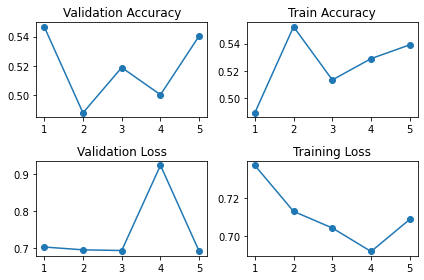

In [ ]:
acc=history_new_cnlst.history["acc"]
val_acc=history_new_cnlst.history["val_acc"]
loss=history_new_cnlst.history["loss"]
val_loss=history_new_cnlst.history["val_loss"]
epochs=np.arange(1,6)

plt.figure()
plt.subplot(2,2,1)
plt.plot(epochs,val_acc,'-o')
plt.title('Validation Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs,acc,'-o')
plt.title('Train Accuracy')

plt.subplot(2,2,3)
plt.plot(epochs,val_loss,'-o')
plt.title('Validation Loss')

plt.subplot(2,2,4)
plt.plot(epochs,loss,'-o')
plt.title('Training Loss')


plt.tight_layout()

In [39]:
modelu_5adv=load_model('cnn_lstm_model_new5adv.h5')
modelu_5adv.evaluate(test_dataset_new,test_labels)

13/13 [==============================] - 4s 266ms/step - loss: 0.6917 - acc: 0.5225


[0.691704273223877, 0.5224999785423279]

In [ ]:
from tensorflow.keras.layers import Conv3D, MaxPooling3D, AveragePooling2D, concatenate, Activation, TimeDistributed, \
    Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras import regularizers

l2_regu = regularizers.l2(0.001)


def incep_a(inputi):
    b1 = TimeDistributed(AveragePooling2D((3, 3), strides=1, padding='same'))(inputi)
    b1 = TimeDistributed(Conv2D(96, (1, 1), strides=1, activation='relu', padding='same'))(b1)

    b2 = TimeDistributed(Conv2D(96, (1, 1), activation='relu', padding='same'))(inputi)

    b3 = TimeDistributed(Conv2D(64, (1, 1), activation='relu', padding='same'))(inputi)
    b3 = TimeDistributed(Conv2D(96, (3, 3), activation='relu', padding='same'))(b3)

    b4 = TimeDistributed(Conv2D(64, (1, 1), activation='relu', padding='same'))(inputi)
    b4 = TimeDistributed(Conv2D(96, (3, 3), activation='relu', padding='same'))(b4)
    b4 = TimeDistributed(Conv2D(96, (3, 3), activation='relu', padding='same'))(b4)

    concatu = concatenate([b1, b2, b3, b4], axis=-1)

    return concatu


def reduction_a(inputi):
    b1 = TimeDistributed(MaxPooling2D((3, 3), strides=2, padding='same'))(inputi)

    b2 = TimeDistributed(Conv2D(384, (3, 3), strides=2, activation='relu', padding='same'))(inputi)

    b3 = TimeDistributed(Conv2D(192, (1, 1), strides=1, activation='relu', padding='same'))(inputi)
    b3 = TimeDistributed(Conv2D(224, (3, 3), strides=1, activation='relu', padding='same'))(b3)
    b3 = TimeDistributed(Conv2D(256, (3, 3), strides=2, activation='relu', padding='same'))(b3)

    concatu = concatenate([b1, b2, b3], axis=-1)
    return concatu


def inception_block(Input):
    base_1 = TimeDistributed(Conv2D(64, (1, 1), strides=2, padding='same', activation='relu'))(Input)
    base_2 = TimeDistributed(Conv2D(64, (1, 1), padding='same', activation='relu'))(Input)
    base_2 = TimeDistributed(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))(base_2)
    base_3 = TimeDistributed(AveragePooling2D(3, strides=2, padding='same'))(Input)
    base_3 = TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu'))(base_3)
    base_4 = TimeDistributed(Conv2D(64, (1, 1), padding='same', activation='relu'))(Input)
    base_4 = TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu'))(base_4)
    base_4 = TimeDistributed(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))(base_4)

    output = concatenate([base_1, base_2, base_3, base_4], axis=-1)

    return output


x = Input(shape=(5, 250, 250, 1))

## 1st Block:
cnlst_1 = TimeDistributed(
    Conv2D(128, (3, 3), strides=2, padding='same', activation='relu', kernel_regularizer=l2_regu))(x)
cnlst_1 = TimeDistributed(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))(cnlst_1)
cnlst_1 = TimeDistributed(MaxPooling2D((2, 2), strides=2, padding='same'))(cnlst_1)

# Batch Normalization:
cnlst_1 = TimeDistributed(BatchNormalization())(cnlst_1)

# Inception_Block_1:
incep_block_1 = inception_block(cnlst_1)

## 2nd Block:
cnlst_2 = TimeDistributed(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu', kernel_regularizer=l2_regu))(
    incep_block_1)
cnlst_2 = TimeDistributed(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))(cnlst_2)
cnlst_2 = TimeDistributed(MaxPooling2D((2, 2), strides=1))(cnlst_2)
cnlst_2 = TimeDistributed(Dropout(0.2))(cnlst_2)
cnlst_2 = TimeDistributed(BatchNormalization())(cnlst_2)

# Incep Block 2:
incep_block_2 = inception_block(cnlst_2)

cnlst_3 = TimeDistributed(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))(incep_block_2)
cnlst_3 = TimeDistributed(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))(cnlst_3)
cnlst_3 = TimeDistributed(MaxPooling2D((2, 2), strides=1, padding='same'))(cnlst_3)
cnlst_3 = TimeDistributed(Dropout(0.2))(cnlst_3)
cnlst_3 = TimeDistributed(BatchNormalization())(cnlst_3)

incep_A = incep_a(cnlst_3)
incep_A = TimeDistributed(Dropout(0.2))(incep_A)
reduc_A = reduction_a(incep_A)
batch_n_a = TimeDistributed(BatchNormalization())(reduc_A)

cnlst_4 = TimeDistributed(Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'))(batch_n_a)
cnlst_4 = TimeDistributed(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'))(cnlst_4)
cnlst_4 = TimeDistributed(MaxPooling2D((2, 2), strides=1, padding='same'))(cnlst_4)
cnlst_4 = TimeDistributed(Dropout(0.3))(cnlst_4)
cnlst_4 = TimeDistributed(BatchNormalization())(cnlst_4)

incep_A_1 = incep_a(cnlst_4)
incep_A_1 = TimeDistributed(Dropout(0.2))(incep_A_1)
reduc_A_1 = reduction_a(incep_A_1)
batch_n_a_1 = TimeDistributed(BatchNormalization())(reduc_A_1)

incep_final_1 = inception_block(batch_n_a_1)
maxpool_final_1 = TimeDistributed(MaxPooling2D((2, 2), strides=2, padding='same'))(incep_final_1)
incep_final_2 = inception_block(maxpool_final_1)
batch_norm_final_1 = TimeDistributed(BatchNormalization())(incep_final_2)
maxpool_final_2 = TimeDistributed(MaxPooling2D((2, 2), strides=2, padding='same'))(batch_norm_final_1)

# Batch Normalization:
batch_norm_new = TimeDistributed(BatchNormalization())(maxpool_final_2)

## Flatten:
flat = TimeDistributed(Flatten())(batch_norm_new)

# LSTM:
# lstm=LSTM(32,return_sequences=False,dropout=0.2,recurrent_dropout=0.3)(flat)


## 2nd Model:
conv_block_1 = TimeDistributed(Conv2D(128, (7, 7), strides=(3, 3), activation='relu', padding="same"))(x)
conv_block_1 = TimeDistributed(Conv2D(256, (5, 5), strides=(2, 2), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), strides=2, padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), strides=2, padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(BatchNormalization())(conv_block_1)
conv_block_1 = TimeDistributed(Dropout(0.2))(conv_block_1)

conv_block_1 = TimeDistributed(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(128, (5, 5), strides=(2, 2), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(
    Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="same", kernel_regularizer=l2_regu))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), strides=2, padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(BatchNormalization())(conv_block_1)
conv_block_1 = TimeDistributed(Dropout(0.2))(conv_block_1)

conv_block_1 = TimeDistributed(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), padding='same'))(conv_block_1)
conv_block_1 = TimeDistributed(BatchNormalization())(conv_block_1)
conv_block_1 = TimeDistributed(Dropout(0.2))(conv_block_1)

conv_block_1 = TimeDistributed(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding="same"))(conv_block_1)
conv_block_1 = TimeDistributed(MaxPooling2D((2, 2), padding='same'))(conv_block_1)
conv_block_1 = TimeDistributed(BatchNormalization())(conv_block_1)
conv_block_1 = TimeDistributed(Dropout(0.2))(conv_block_1)

conv_block_1 = TimeDistributed(Flatten())(conv_block_1)
conv_block_1_outu = Dropout(0.2)(conv_block_1)

concatu = concatenate([conv_block_1_outu, flat])

lstm_layer = LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.3)(concatu)  # used 64 units

batch_norm_new = BatchNormalization()(lstm_layer)
densu_1 = Dense(1024, activation='relu')(batch_norm_new)

# Model 3:
conv_3D = Conv3D(128, (3, 3, 3), strides=2, padding='same')(x)
conv_3D = Conv3D(64, (3, 3, 3), strides=1, padding='same')(conv_3D)
conv_3D = MaxPooling3D((2, 2, 2), strides=2, padding='same')(conv_3D)
conv_3D = Conv3D(64, (3, 3, 3), strides=2, padding='same')(conv_3D)
conv_3D = Conv3D(32, (3, 3, 3), strides=1, padding='same')(conv_3D)
conv_3D = MaxPooling3D((2, 2, 2), padding='same')(conv_3D)
conv_3D = BatchNormalization()(conv_3D)
conv_3D = Dropout(0.3)(conv_3D)
conv_3D = Conv3D(128, (3, 3, 3), strides=2, padding='same', kernel_regularizer=l2_regu)(conv_3D)
conv_3D = MaxPooling3D((2, 2, 2), padding='same')(conv_3D)
conv_3D = Conv3D(64, (3, 3, 3), strides=1, padding='same')(conv_3D)
conv_3D = MaxPooling3D((2, 2, 2), padding='same')(conv_3D)
conv_3D = Conv3D(32, (3, 3, 3), padding='same')(conv_3D)
conv_3D = MaxPooling3D((2, 2, 2), strides=2, padding='same')(conv_3D)
conv_3D = BatchNormalization()(conv_3D)
conv_3D = Flatten()(conv_3D)

densu_2 = Dense(1024, activation='relu')(conv_3D)

# Concatenate:
concat_layer = concatenate([densu_2, densu_1], axis=-1)

densu_3 = Dense(512, activation='relu')(concat_layer)
densu_3 = Dropout(0.2)(densu_3)
densu_3 = Dense(256, activation='relu')(densu_3)
densu_3 = Dense(128, activation='relu')(densu_3)
dense_final = Dropout(0.2)(densu_3)

output_layer = Dense(1, activation='sigmoid')(dense_final)

model_test_new = Model(x, output_layer)
print(model_test_new.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 5, 250, 250, 0                                            
__________________________________________________________________________________________________
time_distributed_152 (TimeDistr (None, 5, 125, 125,  1280        input_3[0][0]                    
__________________________________________________________________________________________________
time_distributed_153 (TimeDistr (None, 5, 125, 125,  73792       time_distributed_152[0][0]       
__________________________________________________________________________________________________
time_distributed_154 (TimeDistr (None, 5, 63, 63, 64 0           time_distributed_153[0][0]       
____________________________________________________________________________________________

In [ ]:
# Conv3d model training:
from keras import optimizers
optimizer_new=optimizers.RMSprop(lr=0.1)
optimizer_adagrad=keras.optimizers.Adagrad(lr=0.01)
callbacks_list_conv_3d=[keras.callbacks.EarlyStopping(
monitor='acc',patience=6),
               keras.callbacks.ModelCheckpoint(
               filepath='stretch_model_conv_3d_new4adv.h5',
               monitor='val_loss',
               save_best_only=True),
                        keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 6)
               ]
model_test_new.compile(optimizer=optimizer_adagrad,loss='binary_crossentropy',metrics=['acc'])
model_test_new_history=model_test_new.fit(train_dataset_new,train_labels,batch_size=3,epochs=50,
               validation_data=(validation_dataset_new,validation_labels),
               callbacks=callbacks_list_conv_3d)

Epoch 1/50
427/427 [==============================] - 97s 202ms/step - loss: 0.9284 - acc: 0.5561 - val_loss: 0.9556 - val_acc: 0.5000
Epoch 2/50
427/427 [==============================] - 85s 200ms/step - loss: 0.8687 - acc: 0.6280 - val_loss: 0.8167 - val_acc: 0.6687
Epoch 3/50
427/427 [==============================] - 87s 203ms/step - loss: 0.8467 - acc: 0.6629 - val_loss: 0.7750 - val_acc: 0.7063
Epoch 4/50
427/427 [==============================] - 86s 202ms/step - loss: 0.8122 - acc: 0.6781 - val_loss: 0.7953 - val_acc: 0.7250
Epoch 5/50
427/427 [==============================] - 86s 202ms/step - loss: 0.8005 - acc: 0.6803 - val_loss: 0.7471 - val_acc: 0.7063
Epoch 6/50
427/427 [==============================] - 86s 202ms/step - loss: 0.7534 - acc: 0.7383 - val_loss: 0.6718 - val_acc: 0.7531
Epoch 7/50
427/427 [==============================] - 86s 202ms/step - loss: 0.7311 - acc: 0.7478 - val_loss: 0.7038 - val_acc: 0.7469
Epoch 8/50
427/427 [==============================] - 8

In [38]:
modelu_6adv=load_model('stretch_model_conv_3d_new4adv.h5')
modelu_6adv.evaluate(test_dataset_new,test_labels)

13/13 [==============================] - 8s 484ms/step - loss: 0.5418 - acc: 0.7950


[0.5418492555618286, 0.7950000166893005]

In [30]:
model1_j = load_model('stretch_model_conv_3d_new4.h5')
model2_j = load_model('cnn_lstm_model_new5adv.h5')
model3_j = load_model('stretch_model_conv_3d_new4adv.h5')

model1_j_in = model1_j.predict(train_dataset_new)
model2_j_in = model2_j.predict(train_dataset_new)
model3_j_in = model3_j.predict(train_dataset_new)

In [31]:
input_dat_in_j = np.hstack([model1_j_in, model2_j_in, model3_j_in])

In [32]:
from keras import layers, models
model_ens=models.Sequential()
model_ens.add(layers.Dense(1,activation='linear',input_shape=(3,)))
model_ens.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_ens.compile(loss='mse',metrics=['acc'],optimizer='rmsprop')

In [34]:
model_ens.fit(input_dat_in_j,train_labels,batch_size=5,epochs=25,validation_split=0.2)

Epoch 1/25
205/205 [==============================] - 1s 3ms/step - loss: 0.1957 - acc: 0.7642 - val_loss: 0.0331 - val_acc: 0.9727
Epoch 2/25
205/205 [==============================] - 0s 2ms/step - loss: 0.0490 - acc: 0.9453 - val_loss: 0.0332 - val_acc: 0.9727
Epoch 3/25
205/205 [==============================] - 0s 2ms/step - loss: 0.0432 - acc: 0.9590 - val_loss: 0.0299 - val_acc: 0.9727
Epoch 4/25
205/205 [==============================] - 0s 2ms/step - loss: 0.0483 - acc: 0.9369 - val_loss: 0.0282 - val_acc: 0.9883
Epoch 5/25
205/205 [==============================] - 0s 2ms/step - loss: 0.0402 - acc: 0.9607 - val_loss: 0.0262 - val_acc: 0.9883
Epoch 6/25
205/205 [==============================] - 0s 2ms/step - loss: 0.0362 - acc: 0.9704 - val_loss: 0.0260 - val_acc: 0.9922
Epoch 7/25
205/205 [==============================] - 0s 2ms/step - loss: 0.0379 - acc: 0.9584 - val_loss: 0.0231 - val_acc: 0.9961
Epoch 8/25
205/205 [==============================] - 0s 2ms/step - loss: 0.

In [35]:
model1_j_out = model1_j.predict(test_dataset_new)
model2_j_out = model2_j.predict(test_dataset_new)
model3_j_out = model3_j.predict(test_dataset_new)

In [36]:
model_out_final_j = np.hstack([model1_j_out, model2_j_out, model3_j_out])

In [37]:
ensemble_loss,ensemble_accuracy=model_ens.evaluate(model_out_final_j,test_labels)
ensemble_accuracy

13/13 [==============================] - 0s 2ms/step - loss: 0.1238 - acc: 0.8300


0.8299999833106995

In [ ]:
def real_time_prediction(path,video_folder_name):
    folder_path=os.path.join(path,video_folder_name)
    video_list=os.listdir(folder_path)
    prediction_list_1=[]
    prediction_list_2=[]
    prediction_list_3=[]
    for i in np.arange(len(video_list)):
        video_path=os.path.join(folder_path,video_list[i])
        cap=cv2.VideoCapture(video_path)
        cap.set(cv2.CAP_PROP_FPS, 1)
        frameRate=cap.get(5)
        x=1
        count=0
        frame_saved=[]
        while(cap.isOpened()):
            frameId = cap.get(1) #current frame number
            ret, frame = cap.read()
            if (ret != True):
                break
            if (frameId % math.floor(frameRate) == 0):
                frame_grey=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                frame_grey=cv2.resize(frame_grey,(250,250))
                frame_grey=frame_grey/255
                frame_saved.append(frame_grey)
        cap.release()
        frame_diff=10-len(frame_saved)
        if frame_diff>0:
            for k in np.arange(frame_diff):
                frame_saved.append(frame_saved[k])
        else:
            pass
        frame_saved=frame_saved[:10]
        frame_saved=np.array(frame_saved)
        dats=frame_saved.reshape((1,10,250,250,1))
        prediction_list_1.append(model1_j.predict(dats))
        prediction_list_2.append(model2_j.predict(dats))
        prediction_list_3.append(model3_j.predict(dats))
    return prediction_list_1, prediction_list3

In [ ]:
path1= os.path.join(path, 'RTPF')

In [ ]:
prediction_model_1,prediction_model_3=real_time_prediction(path1,"test_rl_1")
predu_1=[]
for i in prediction_model_1:
    predu_1.append(list(i[0])[0])
#predu_2=[]
#for i in prediction_model_2:
    #predu_2.append(list(i[0])[0])
predu_3=[]
for i in prediction_model_3:
    predu_3.append(list(i[0])[0])
times=[[0,5],[6,10],[11,15],[16,20],[21,25],[26,30],[31,35],[36,40],[41,45],[46,50],[51,55],[56,60]]
time_axis=[]
for i in times:
    time_axis.append(str(i[0])+"_"+str(i[1]))
    
main_preds=0.4*(np.array(predu_1))+0.6*(np.array(predu_3))


    
plt.figure()
plt.plot(time_axis,main_preds,"-o")
plt.xlabel("Time slots of video in Seconds")
plt.xticks(rotation=60)
plt.ylabel("Predictions")
plt.title("Model_Predictions")
plt.show()

InvalidArgumentError: ignored